# 数据预处理

数据预处理包含对图像进行数据增强和对标签进行处理等操作，这里主要介绍图像处理部分。

在模型训练过程中有时会遇到过拟合的问题，其中一个解决方法就是对训练数据做数据处理或增强。数据处理通过对数据进行处理得到不同的图像，从而增强模型的泛化性。

## paddle.vision.transforms 介绍

飞桨框架在 [paddle.vision.transforms](../../api/paddle/vision/Overview_cn.html#about-transforms) 下内置了数十种数据处理方法，可以通过以下代码查看：

In [2]:
import paddle
print('数据处理方法：', paddle.vision.transforms.__all__)

数据处理方法： ['BaseTransform', 'Compose', 'Resize', 'RandomResizedCrop', 'CenterCrop', 'RandomHorizontalFlip', 'RandomVerticalFlip', 'Transpose', 'Normalize', 'BrightnessTransform', 'SaturationTransform', 'ContrastTransform', 'HueTransform', 'ColorJitter', 'RandomCrop', 'Pad', 'RandomRotation', 'Grayscale', 'ToTensor', 'to_tensor', 'hflip', 'vflip', 'resize', 'pad', 'rotate', 'to_grayscale', 'crop', 'center_crop', 'adjust_brightness', 'adjust_contrast', 'adjust_hue', 'normalize']


对于飞桨框架内置的数据处理方法，可以单个初始化调用，也可以将多个数据处理方法进行组合使用，具体使用方式如下：

* 单个使用

In [3]:
from paddle.vision.transforms import Resize

# 定义想要使用的数据处理方式，这里初始化一个改变图片大小的变换
transform = Resize(size=28)

* 多个组合使用

这种使用模式下，需要先定义好每个数据处理方法，然后用`Compose` 进行组合

In [4]:
from paddle.vision.transforms import Compose, RandomRotation

# 定义想要使用的数据处理方式，这里包括随机旋转，改变图片大小
transform = Compose([RandomRotation(10), Resize(size=32)])

## 在数据集中定义数据预处理操作

定义好数据预处理方法后，可以直接在 DataSet 中使用，下面介绍两种数据处理使用方式，一种是基于框架内置数据集，一种是基于自定义的数据集。

### 基于框架内置数据集

在框架内置数据集中使用内置的数据处理方法时，只需要将数据处理操方法传递给 `transform` 字段即可。

In [5]:
# 通过transform参数传递定义好的数据增强方法即可完成对自带数据集的增强
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)

### 基于自定义的数据集

对于自定义的数据集，可以在数据集的 `__init__` 函数中定义数据处理方法，之后在 `__getitem__` 方法中对返回的数据应用数据预处理, 如下述代码所示：

In [ ]:
# 下载 MNIST 数据集并解压
! wget https://paddle-imagenet-models-name.bj.bcebos.com/data/mnist.tar
! tar -xf mnist.tar

In [6]:
import os
import cv2
import numpy as np
from paddle.io import Dataset

class MyDataset(Dataset):
    """
    步骤一：继承 paddle.io.Dataset 类
    """
    def __init__(self, data_dir, label_path, transform=None):
        """
        步骤二：实现 __init__ 函数，定义数据集大小
        """
        super(MyDataset, self).__init__()
        self.data_list = []
        with open(label_path,encoding='utf-8') as f:
            for line in f.readlines():
                image_path, label = line.strip().split('\t')
                image_path = os.path.join(data_dir, image_path)
                self.data_list.append([image_path, label])
        self.transform = transform

    def __getitem__(self, index):
        """
        步骤三：实现 __getitem__ 函数，定义指定 index 时如何获取数据，并返回单条数据（训练数据、对应的标签）
        """
        # 根据索引，从列表中取出一个
        image_path, label = self.data_list[index]
        # 读取灰度图
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # 图像数据格式转换为 float32，此步骤为必须
        image = image.astype('float32')
        if self.transform is not None:
            image = self.transform(image)
        label = int(label)
        return image, label

    def __len__(self):
        """
        步骤四：实现 __len__ 函数，返回数据集的样本总数
        """
        return len(self.data_list)
    
custom_dataset = MyDataset('mnist/train','mnist/train/label.txt', transform)

在自定义数据集中，直接将定义好的数据预处理传入`__init__`方法，将其定义为自定义数据集类的一个属性，然后在`__getitem__`中将数据预处理应用到图像上。

## 数据处理的几种方法介绍

### RandomRotation:

依据degrees参数指定的角度范围，按照均匀分布随机产生一个角度对图像进行旋转。

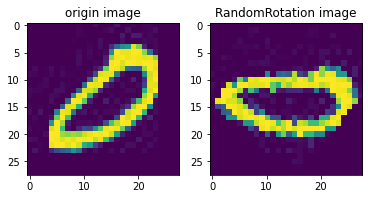

In [12]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import RandomRotation

transform = RandomRotation(90)

image = cv2.imread('mnist/train/imgs/0/0.jpg', cv2.IMREAD_GRAYSCALE)

RandomRotation_image = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('RandomRotation image')
plt.imshow(RandomRotation_image)

### RandomHorizontalFlip

基于概率来执行图片的水平翻转。

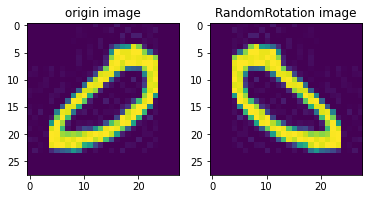

In [15]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import RandomHorizontalFlip

transform = RandomHorizontalFlip(0.5)

image = cv2.imread('mnist/train/imgs/0/0.jpg', cv2.IMREAD_GRAYSCALE)

RandomRotation_image = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('RandomRotation image')
plt.imshow(RandomRotation_image)

更多数据预处理可以参考  [paddle.vision.transforms](../../api/paddle/vision/Overview_cn.html#about-transforms) 

## 总结

本节介绍了数据预处理在数据集中的使用方式并介绍了常用的数据预处理操作。